## Lesson 5: Coding and Financial Analysis

https://learn.deeplearning.ai/courses/ai-agentic-design-patterns-with-autogen/lesson/6/coding-and-financial-analysis

In [1]:
import datetime
import os

from autogen import AssistantAgent, ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor
from dotenv import find_dotenv, load_dotenv
from IPython.display import Image

In [2]:
load_dotenv(find_dotenv())

MODEL_NAME = "glm-4"
BASE_URL = "https://open.bigmodel.cn/api/paas/v4/"

llm_config = {"model": MODEL_NAME, "base_url": BASE_URL, "temperature": 0.5}

### Define a code executor

In [4]:
executor = LocalCommandLineCodeExecutor(timeout=60, work_dir="coding")

### Create agents

#### 1. Agent with code executor configuration

In [5]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

#### 2. Agent with code writing capability

In [6]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [7]:
code_writer_agent_system_message = code_writer_agent.system_message

In [8]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### The task!
Ask the two agents to collaborate on a stoch analysis task.

In [11]:
today = datetime.datetime.now().date()

message = f"""Today is {today}. Create a plot showing stock gain YTD for NVDA and TLSA.
    Use `yfinance` to fetch stoch data.
    Make sure the code is in markdown code block and
    save the figure to a file ytd_stock_gains.png
"""

In [12]:
chat_result = code_executor_agent.initiate_chat(
    recipient=code_writer_agent, message=message
)

code_executor_agent (to code_writer_agent):

Today is 2024-06-10. Create a plot showing stock gain YTD for NVDA and TLSA.
    Use `yfinance` to fetch stoch data.
    Make sure the code is in markdown code block and
    save the figure to a file ytd_stock_gains.png


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a plot showing the stock gain Year-to-Date (YTD) for NVDA (NVIDIA Corporation) and TLSA (Tesla, Inc.), we will use the `yfinance` library to fetch the stock data. Since we need to save the plot to a file, the code will include instructions to do so. If `yfinance` is not installed, the user will need to install it first, which I will handle in the code block.

Here is the Python code to achieve this task:

```python
# filename: ytd_stock_gain_plot.py
import yfinance as yf
import matplotlib.pyplot as plt

# List of stock tickers
tickers = ['NVDA', 'TLSA']

# Fetch data for the current year
da

### Let's see the plot!

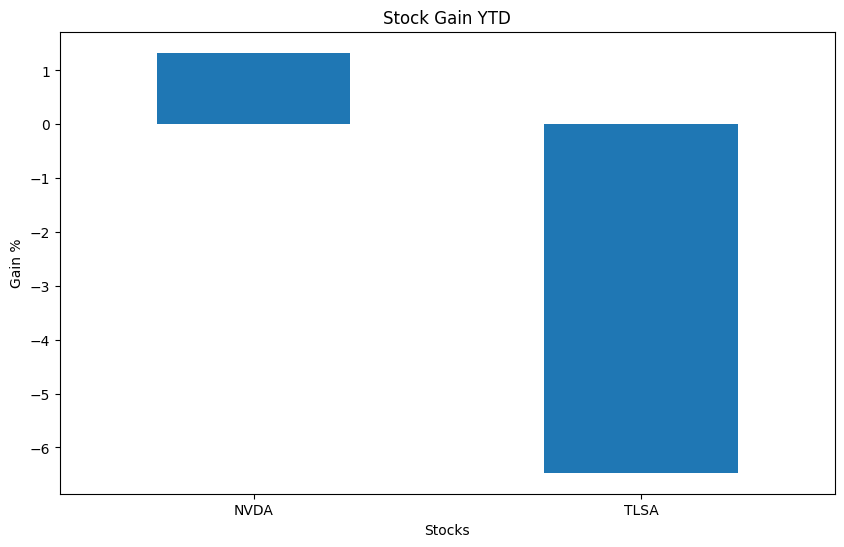

In [13]:
Image(os.path.join("coding", "ytd_stock_gains.png"))

### User-Defined Functions
Instead of asking LLM to generate the code for downloading stock data and plotting chats each time,
you can define functions for these two tasks and have LLM call these functions in the code.

In [14]:
def get_stock_prices(stock_symbols: str | list, start_date: str, end_date: str):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        tickers=stock_symbols, start=start_date, end=end_date
    )

    return stock_data.get("Close")

In [21]:
def plot_stock_prices(stock_prices, filename: str):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
            given stock symbols.
        filename (str): The filename to save the plot to.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))

    for column in stock_prices.columns:
        plt.plot(stock_prices.index, stock_prices[column], label=column)

    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions

In [22]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [23]:
code_writer_agent_system_message += executor.format_functions_for_prompt()

print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

In [24]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [25]:
chat_result = code_executor_agent.initiate_chat(
    recipient=code_writer_agent,
    message=f"""Today is {today},
        Download the stock prices YTD for NVDA and TLSA and create a plot.
        Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.,
    """,
)

code_executor_agent (to code_writer_agent):

Today is 2024-06-10,
        Download the stock prices YTD for NVDA and TLSA and create a plot.
        Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.,
    

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To complete this task, we need to download the stock prices for NVDA and TLSA from the beginning of the year until today, and then create a plot of these stock prices. We will use the `get_stock_prices` function to download the data and the `plot_stock_prices` function to create the plot.

Here is the Python code to achieve this. Please note that you should have the `functions` module available in your environment for this code to work.

```python
# filename: stock_prices_plot.py
from functions import get_stock_prices, plot_stock_prices
import pandas as pd

# Set the stock symbols and the date range
stock_sym

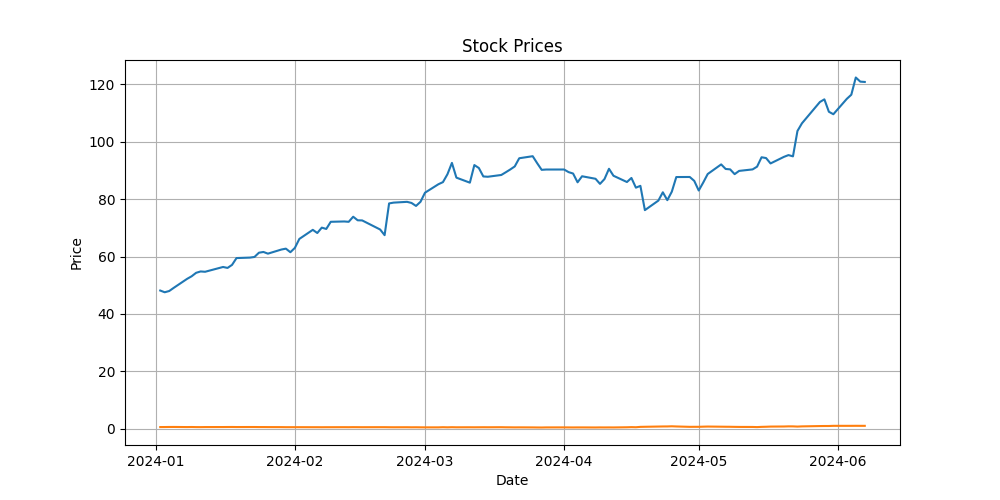

In [26]:
Image(os.path.join("coding", "stock_prices_YTD_plot.png"))